In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/air-passengers/AirPassengers.csv


In [2]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
df = df.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


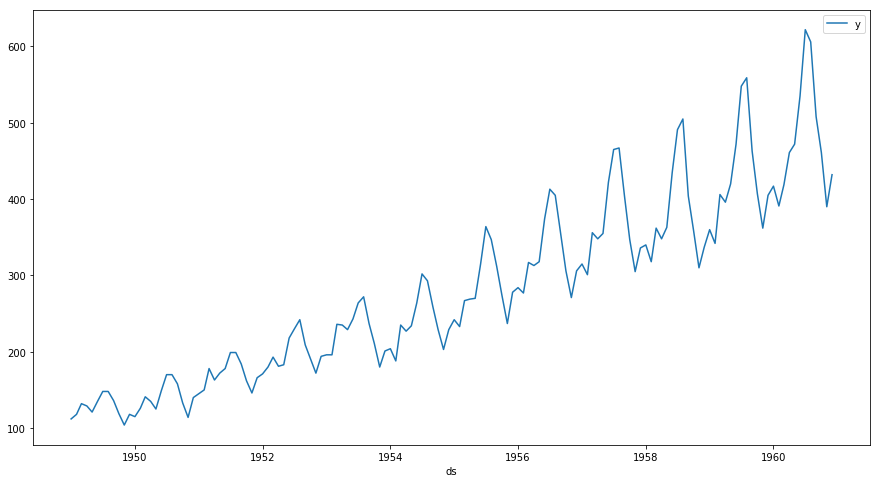

In [6]:
ax = df.set_index('ds')

plt.figure(figsize=(15,8))
sns.lineplot(legend = 'full' , data=ax)

In [7]:
model=Prophet()
model.fit(df)

In [8]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [9]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
504,1961-11-27,499.316323,472.095676,526.647895
505,1961-11-28,497.730556,469.135075,528.057371
506,1961-11-29,495.440200,467.011073,523.866059
507,1961-11-30,492.487305,464.266508,520.781498
508,1961-12-01,488.931173,460.649054,518.138260


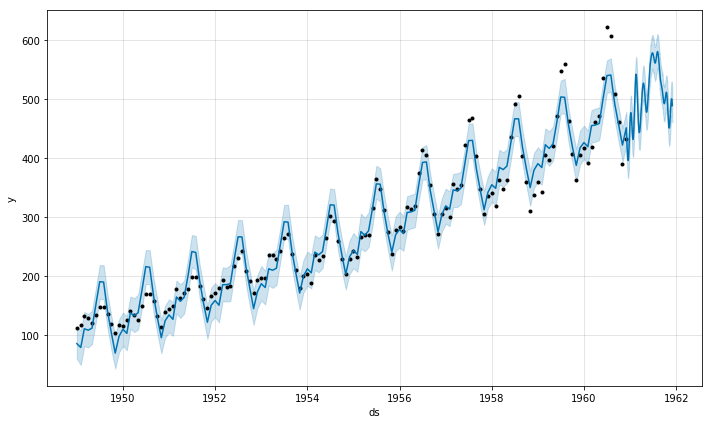

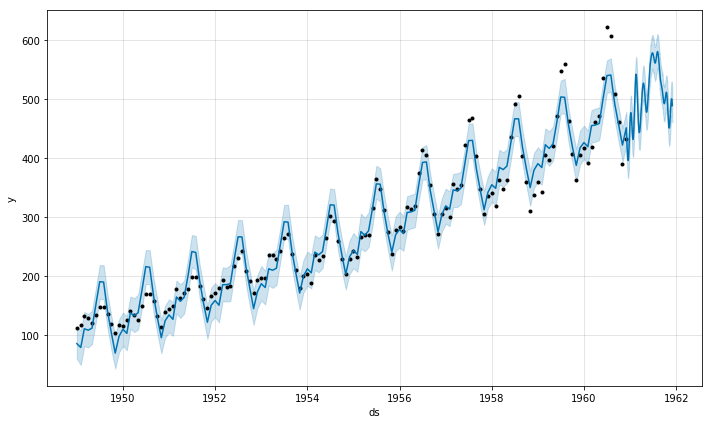

In [10]:
model.plot(forecast)

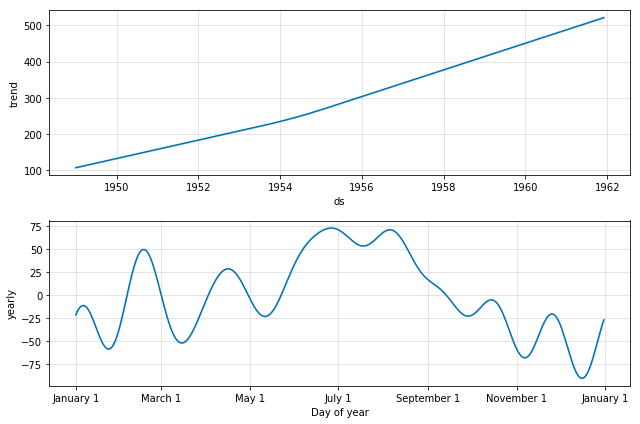

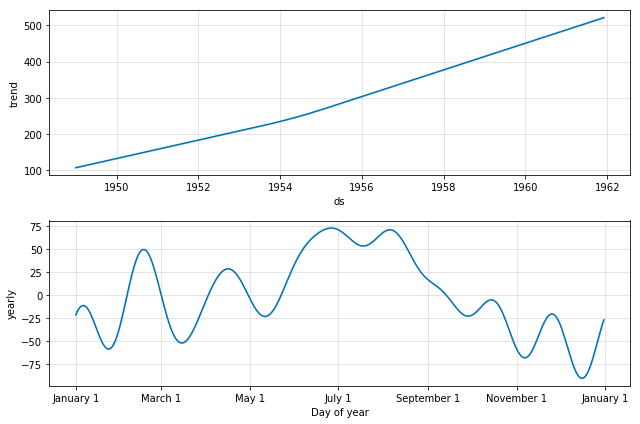

In [11]:
model.plot_components(forecast)